# Bienvenidos a la 10ma práctica de Física Computacional 2024-2 
* Alumna Ayudante: Valentina Santelices
    * Correo: vsantelices2021@udec.cl
* Alumno Ayudante: Juan Ortega
    * Correo: juortega2019@udec.cl

# Ejercicios para Practicar Integrales con `np.trapz`

Estos ejercicios están diseñados para ayudarte a practicar la integración numérica usando `np.trapz` en Python.

## Ejercicio 1: Cálculo del Área Bajo una Recta

Dada una función lineal $f(x) = 2x + 1$ en el intervalo $x = [0, 5]$:

1. Define los puntos $x = [0, 1, 2, 3, 4, 5]$ y evalúa $y = f(x)$ en esos puntos.
2. Usa `np.trapz(y, x)` para calcular el área bajo la curva en este intervalo.
3. Verifica si el área obtenida coincide con el resultado analítico de la integral de $2x + 1$ entre 0 y 5.

**Respuesta esperada**: El área debería ser 30.

---

## Ejercicio 2: Aproximación del Área Bajo una Función Cuadrática

Dada la función $f(x) = x^2 - 3x + 2$ en el intervalo $x = [0, 3]$:

1. Genera un conjunto de puntos $x$ uniformemente distribuidos en el intervalo $[0, 3]$ con al menos 6 puntos (por ejemplo, `x = np.linspace(0, 3, 6)`).
2. Calcula $y = f(x)$ evaluando la función en cada punto.
3. Usa `np.trapz(y, x)` para aproximar el área bajo la curva.
4. Calcula la integral analítica de $f(x) = x^2 - 3x + 2$ entre 0 y 3 y compara el resultado.

**Respuesta esperada**: El área debería ser aproximadamente 1.5.

---

## Ejercicio 3: Integral de una Función Trigonométrica en un Intervalo

Dada la función $f(x) = \sin(x)$ en el intervalo $x = [0, \pi]$:

1. Crea un conjunto de puntos $x$ distribuidos uniformemente en el intervalo $[0, \pi]$ (por ejemplo, `x = np.linspace(0, np.pi, 100)`).
2. Calcula $y = f(x) = \sin(x)$ en esos puntos.
3. Usa `np.trapz(y, x)` para aproximar el área bajo la curva en el intervalo dado.
4. Calcula la integral analítica de $\sin(x)$ entre 0 y $\pi$ para comparar.

**Respuesta esperada**: El área debería ser aproximadamente 2.


**Pregunta 11** (2 pts) El principio del argumento de Cauchy indica que si $ f(z) $ es una función meromorfa sin polos en una región encerrada por un contorno $ C $, entonces

$$
N = \frac{1}{2\pi i} \oint_{C} \frac{f'(z)}{f(z)} \, dz,
$$

representa el número $ N $ de ceros de $ f $, i.e., donde $ f(z) = 0 $, que están encerrados por el contorno $ C $.

Calcule numéricamente la cantidad de ceros para las siguientes funciones en la región que se especifica:

(a) $ f(z) = z^4 - \frac{1}{2} $ dentro del disco de radio unitario $ |z| < 1 $.

(b) $ f(z) = z^4 - 5z + 1 $ dentro de la región anular $ 1 < |z| < 2 $.

(c) $ f(z) = \sin z + \frac{1}{(z + i)} $ en la región cuadrada $ -1 < \text{Im}(z) < 1 $ y $ \pi(100 + \frac{1}{2}) < \text{Re}(z) < \pi(200 + \frac{1}{2}) $.


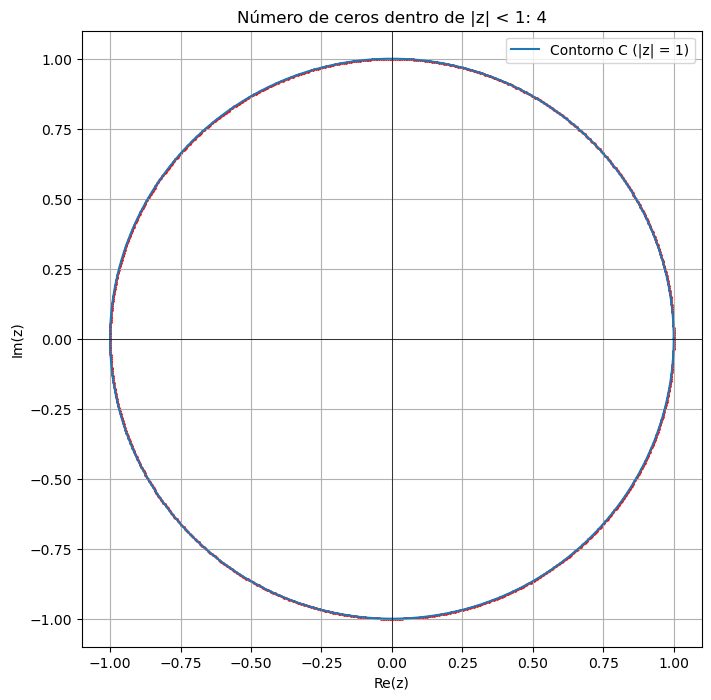

(3.9999736283901375+0j)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función y su derivada
def f(z):
    return z**4 - 0.5

def df(z):
    return 4 * z**3

# Parametrizamos el contorno C (el círculo unitario)
theta = np.linspace(0, 2 * np.pi, 1000)
z_contour = np.exp(1j * theta)  # Círculo unitario |z| = 1

# Evaluamos la integral numéricamente usando el método de trapezoides
integrand = df(z_contour) / f(z_contour)
integral_value = np.trapz(integrand, z_contour)

# Calculamos el número de ceros usando el principio del argumento
N_zeros = integral_value / (2j * np.pi)

# Generamos la gráfica
plt.figure(figsize=(8, 8))
plt.plot(np.real(z_contour), np.imag(z_contour), label='Contorno C (|z| = 1)')
plt.scatter(np.real(z_contour), np.imag(z_contour), s=1, color='red')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title(f'Número de ceros dentro de |z| < 1: {round(N_zeros.real)}')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.grid()
plt.legend()
plt.show()

# Resultado del número de ceros
N_zeros


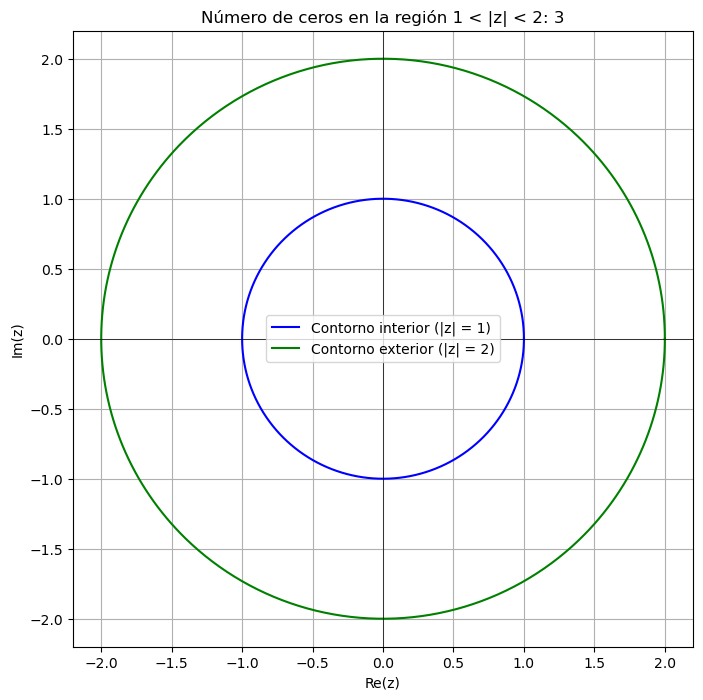

(2.9999802212926028-1.766974823035287e-17j)

In [2]:
# Para la parte (b), consideramos la función f(z) = z^4 - 5z + 1 en la región anular 1 < |z| < 2.

# Definimos la función y su derivada
def f_b(z):
    return z**4 - 5*z + 1

def df_b(z):
    return 4 * z**3 - 5

# Parametrizamos los contornos del anillo
theta = np.linspace(0, 2 * np.pi, 1000)
contour_inner = np.exp(1j * theta)  # Contorno interior |z| = 1
contour_outer = 2 * np.exp(1j * theta)  # Contorno exterior |z| = 2

# Evaluamos la integral numéricamente para ambos contornos usando el método de trapezoides
integrand_inner = df_b(contour_inner) / f_b(contour_inner)
integrand_outer = df_b(contour_outer) / f_b(contour_outer)

# Calculamos el valor de las integrales
integral_inner = np.trapz(integrand_inner, contour_inner)
integral_outer = np.trapz(integrand_outer, contour_outer)

# Calculamos el número de ceros dentro de cada contorno
N_inner = integral_inner / (2j * np.pi)
N_outer = integral_outer / (2j * np.pi)

# El número de ceros en la región anular es la diferencia
N_zeros_annulus = N_outer - N_inner

# Generamos la gráfica
plt.figure(figsize=(8, 8))
plt.plot(np.real(contour_inner), np.imag(contour_inner), label='Contorno interior (|z| = 1)', color='blue')
plt.plot(np.real(contour_outer), np.imag(contour_outer), label='Contorno exterior (|z| = 2)', color='green')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title(f'Número de ceros en la región 1 < |z| < 2: {round(N_zeros_annulus.real)}')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.grid()
plt.legend()
plt.show()

# Resultado del número de ceros en la región anular
N_zeros_annulus


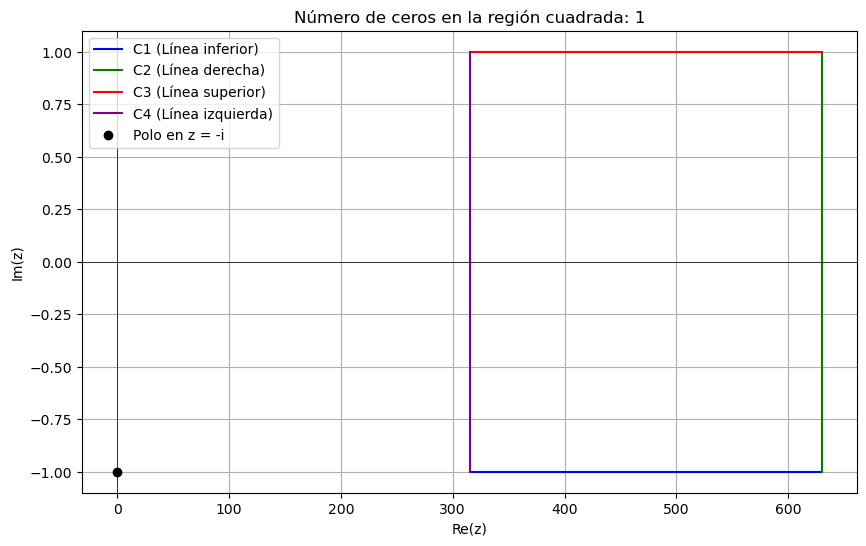

1.000003089329833

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función f(z) y su derivada f'(z)
def f(z):
    return np.sin(z) + 1 / (z + 1j)

def df(z):
    return np.cos(z) - 1 / (z + 1j)**2

# Parámetros para el contorno cuadrado
n_points = 1000
x_left = np.pi * (100 + 0.5)
x_right = np.pi * (200 + 0.5)
y_bottom = -1
y_top = 1

# Definir los contornos C1, C2, C3 y C4
x = np.linspace(x_left, x_right, n_points)
y = np.linspace(y_bottom, y_top, n_points)

# C1: Línea inferior (y = -1)
C1 = x + 1j * y_bottom
integrand_C1 = df(C1) / f(C1)

# C2: Línea derecha (x = 200π)
C2 = x_right + 1j * y
integrand_C2 = df(C2) / f(C2)

# C3: Línea superior (y = 1)
C3 = x + 1j * y_top
integrand_C3 = df(C3) / f(C3)

# C4: Línea izquierda (x = 100π)
C4 = x_left + 1j * y
integrand_C4 = df(C4) / f(C4)

# Calcular las integrales usando np.trapz
integral_C1 = np.trapz(integrand_C1, x)
integral_C2 = 1j * np.trapz(integrand_C2, y)
integral_C3 = np.trapz(integrand_C3, x)
integral_C4 = -1j * np.trapz(integrand_C4, y)


# Sumar las integrales de los contornos
total_integral = integral_C1 + integral_C2 + integral_C3 + integral_C4

# Calcular el número de ceros considerando el polo en z = -i
N_poles = 1  # Polo simple en z = -i
N_zeros = total_integral / (2 * np.pi * 1j) + N_poles

# Visualizar el contorno
plt.figure(figsize=(10, 6))
plt.plot(np.real(C1), np.imag(C1), label='C1 (Línea inferior)', color='blue')
plt.plot(np.real(C2), np.imag(C2), label='C2 (Línea derecha)', color='green')
plt.plot(np.real(C3), np.imag(C3), label='C3 (Línea superior)', color='red')
plt.plot(np.real(C4), np.imag(C4), label='C4 (Línea izquierda)', color='purple')
plt.scatter(np.real(-1j), np.imag(-1j), color='black', label='Polo en z = -i', zorder=5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title(f'Número de ceros en la región cuadrada: {round(N_zeros.real)}')
plt.grid()
plt.legend()
plt.show()


# Resultado del número de ceros
N_zeros.real
